In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("enfermedad.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EDAD                   2602 non-null   int64  
 1   PLAN_BENEFICIOS        2602 non-null   object 
 2   SEDE                   2602 non-null   object 
 3   NOMBRE_DIAG            2602 non-null   object 
 4   PESO                   2602 non-null   float64
 5   TALLA                  2602 non-null   int64  
 6   IMC                    2602 non-null   object 
 7   CARDIOVASCULAR         2602 non-null   object 
 8   PULMONAR               2602 non-null   object 
 9   NEUROLÓGICO            2602 non-null   object 
 10  MENTAL                 2602 non-null   object 
 11  OSTEOMUSCULAR          2602 non-null   object 
 12  BODEX                  2602 non-null   object 
 13  RESULTADOIMC           2602 non-null   object 
 14  ESCALA DISNEA          2602 non-


Valores faltantes por columna:
EDAD                     0
PLAN_BENEFICIOS          0
SEDE                     0
NOMBRE_DIAG              0
PESO                     0
TALLA                    0
IMC                      0
CARDIOVASCULAR           0
PULMONAR                 0
NEUROLÓGICO              0
MENTAL                   0
OSTEOMUSCULAR            0
BODEX                    0
RESULTADOIMC             0
ESCALA DISNEA            0
RIESGO CARDIOVASCULAR    0
EPOCCONFIRMADO           0
CLASIFISUI               0
DISCAPACIDAD             0
covid1                   0
covid2                   0
covid3                   0
GENERO                   0
IDENTGEN                 0
ORIGSEX                  0
GRUPO ETNICO             0
NIVELEDUCATIVO           0
TIPODISCAPAC             0
OCUPACION                0
dtype: int64


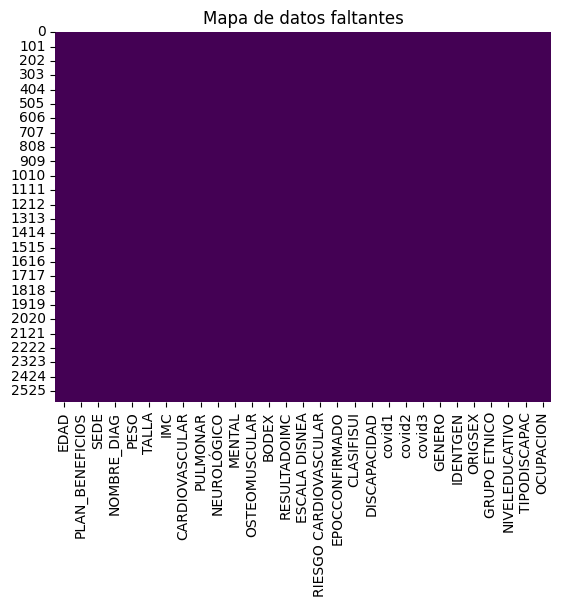

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()


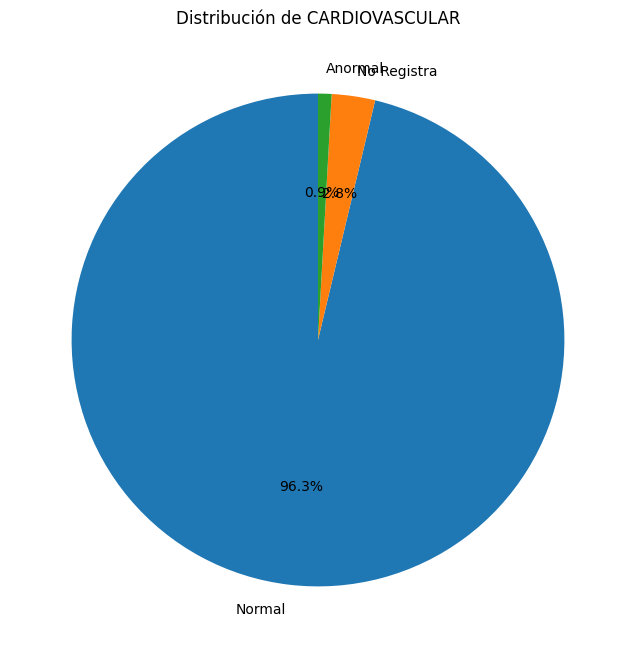

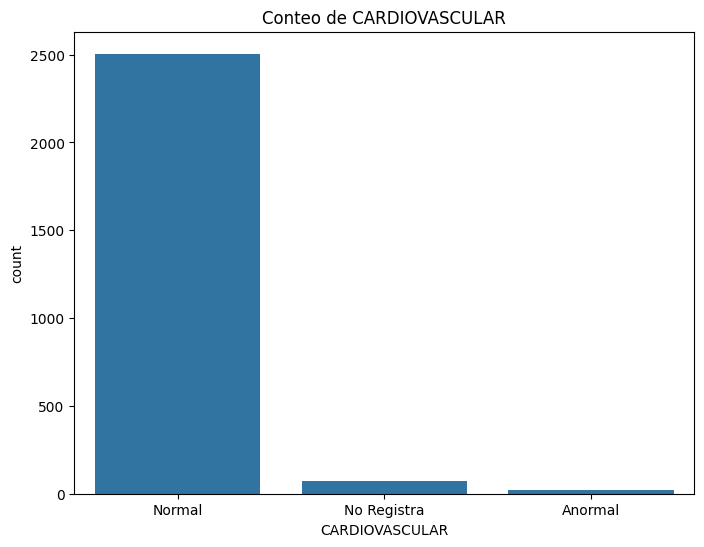

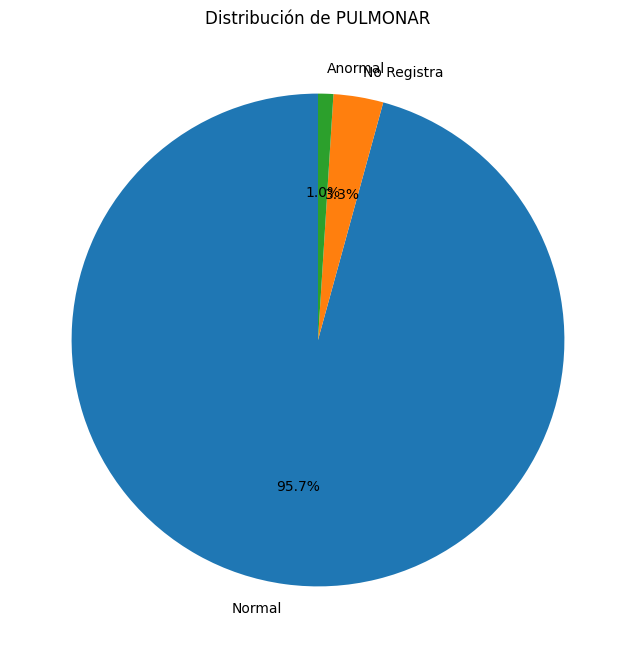

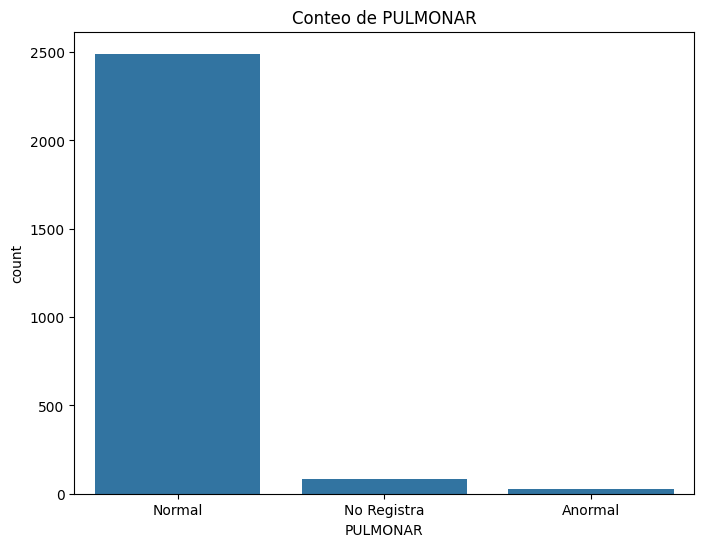

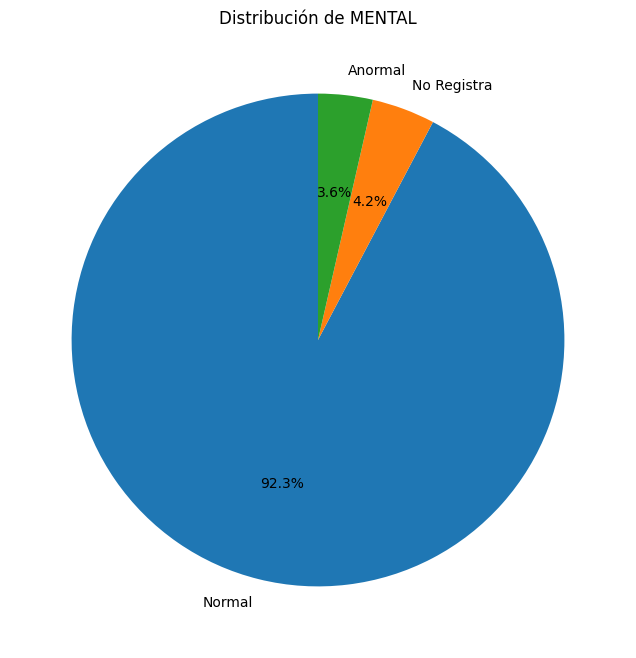

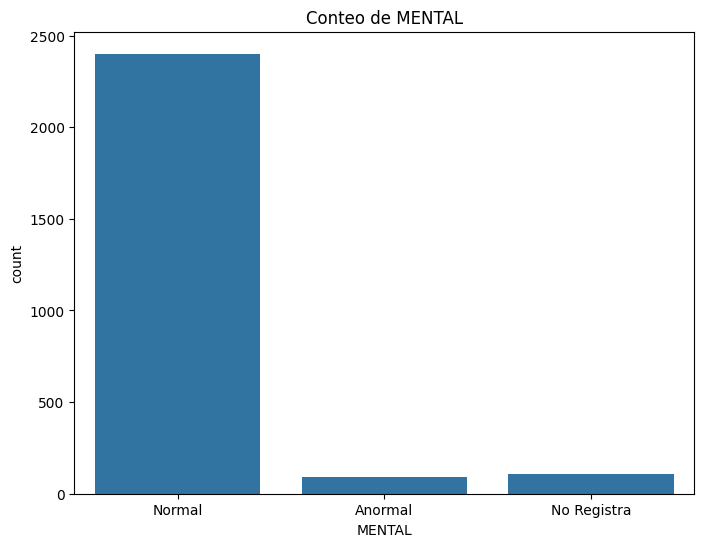

In [ ]:
# Diagrama de torta para 'CARDIOVASCULAR'
plt.figure(figsize=(8, 8))
df['CARDIOVASCULAR'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribución de CARDIOVASCULAR')
plt.ylabel('')
plt.show()

# Diagrama de barras para 'CARDIOVASCULAR'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CARDIOVASCULAR')
plt.title('Conteo de CARDIOVASCULAR')
plt.show()

# Diagrama de torta para 'PULMONAR'
plt.figure(figsize=(8, 8))
df['PULMONAR'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribución de PULMONAR')
plt.ylabel('')
plt.show()

# Diagrama de barras para 'PULMONAR'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PULMONAR')
plt.title('Conteo de PULMONAR')
plt.show()

# Diagrama de torta para 'MENTAL'
plt.figure(figsize=(8, 8))
df['MENTAL'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribución de MENTAL')
plt.ylabel('')
plt.show()

# Diagrama de barras para 'MENTAL'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MENTAL')
plt.title('Conteo de MENTAL')
plt.show()

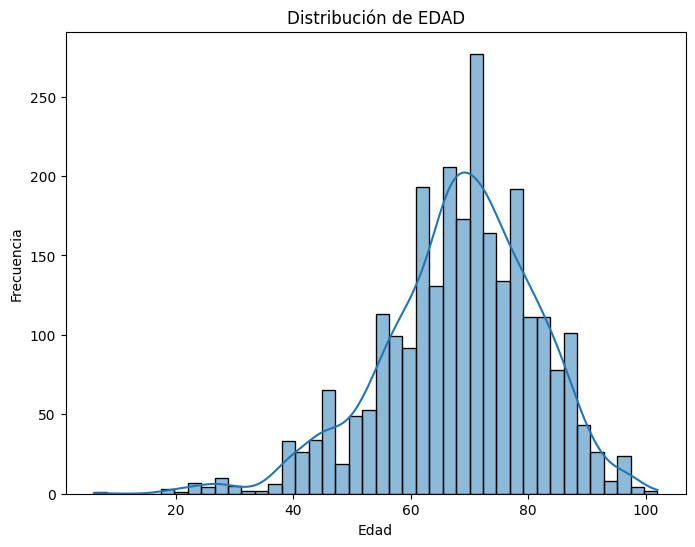

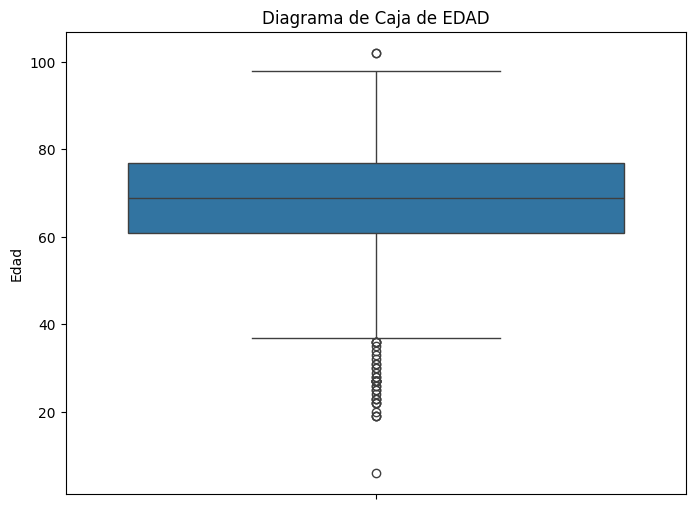

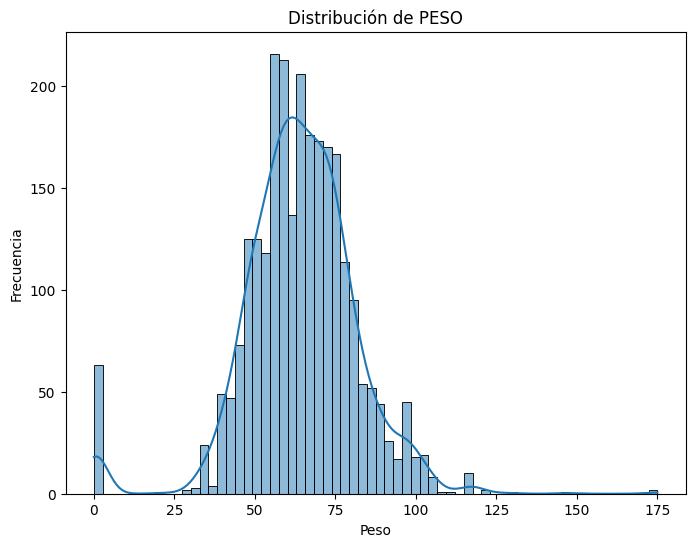

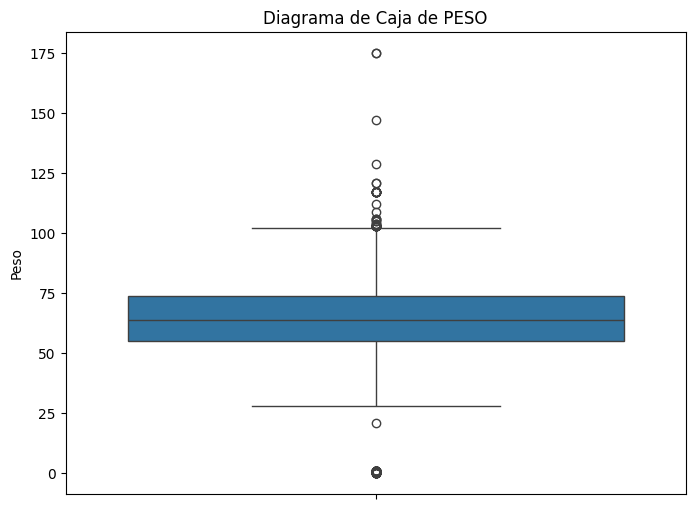

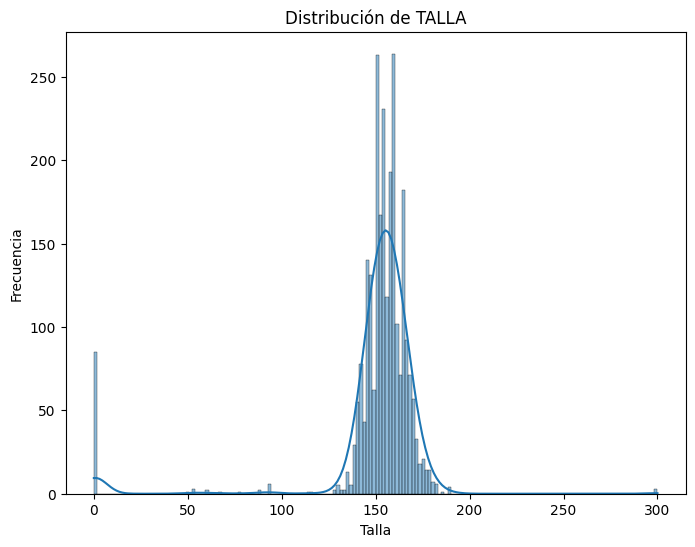

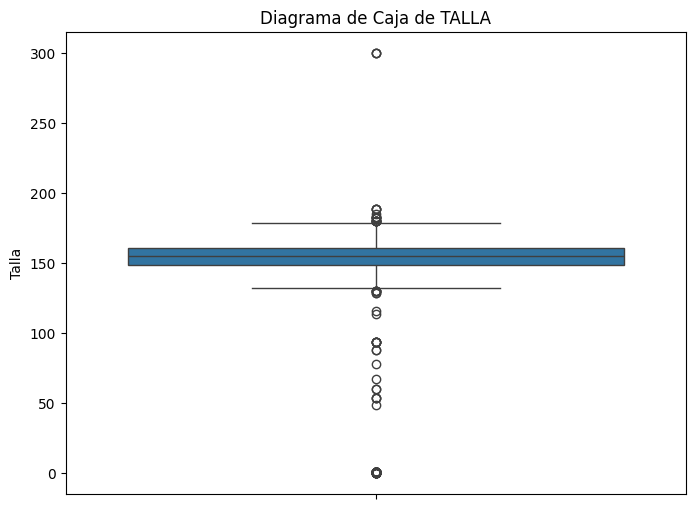

In [ ]:
# Histograma para 'EDAD'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='EDAD', kde=True)
plt.title('Distribución de EDAD')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para 'EDAD'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='EDAD')
plt.title('Diagrama de Caja de EDAD')
plt.ylabel('Edad')
plt.show()

# Histograma para 'PESO'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='PESO', kde=True)
plt.title('Distribución de PESO')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para 'PESO'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='PESO')
plt.title('Diagrama de Caja de PESO')
plt.ylabel('Peso')
plt.show()

# Histograma para 'TALLA'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='TALLA', kde=True)
plt.title('Distribución de TALLA')
plt.xlabel('Talla')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para 'TALLA'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='TALLA')
plt.title('Diagrama de Caja de TALLA')
plt.ylabel('Talla')
plt.show()

In [ ]:
# Función para eliminar outliers usando IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Eliminar outliers de las columnas numéricas
df_cleaned = df.copy()
for col in ['EDAD', 'PESO', 'TALLA']:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

print(f"Dimensiones del dataset original: {df.shape}")
print(f"Dimensiones del dataset después de eliminar outliers: {df_cleaned.shape}")

Dimensiones del dataset original: (2602, 29)
Dimensiones del dataset después de eliminar outliers: (2388, 29)


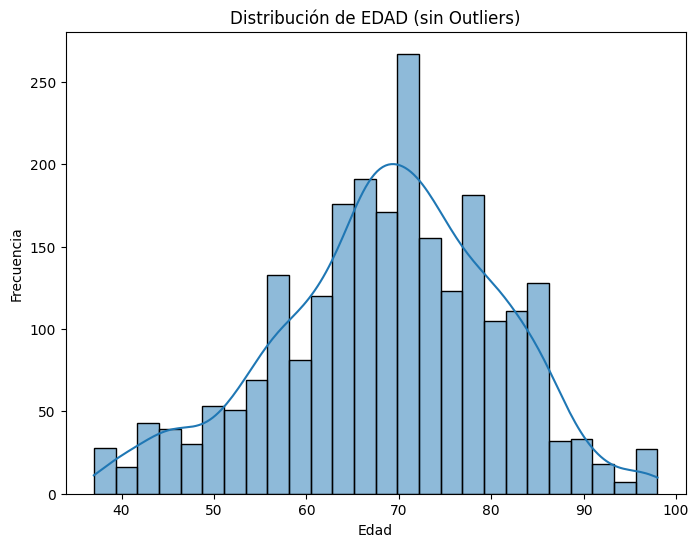

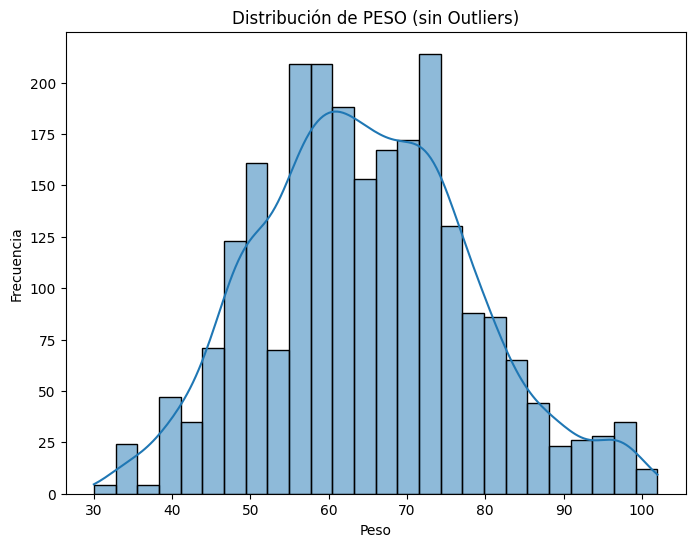

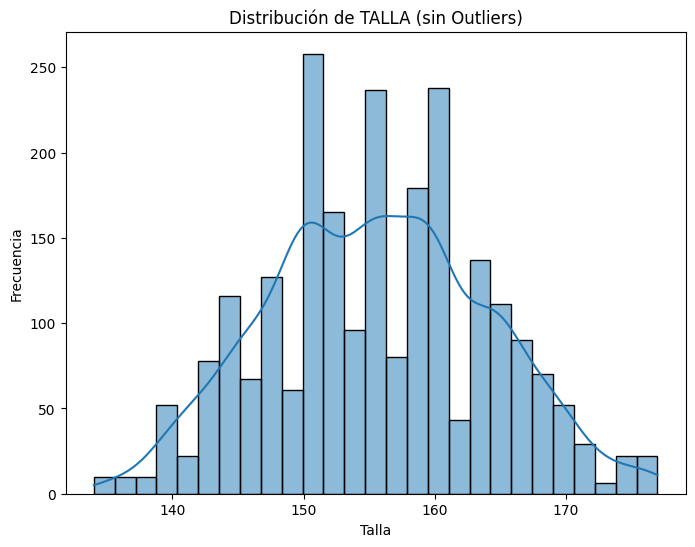

In [ ]:
# Histograma para 'EDAD' sin outliers
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, x='EDAD', kde=True)
plt.title('Distribución de EDAD (sin Outliers)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para 'PESO' sin outliers
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, x='PESO', kde=True)
plt.title('Distribución de PESO (sin Outliers)')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para 'TALLA' sin outliers
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, x='TALLA', kde=True)
plt.title('Distribución de TALLA (sin Outliers)')
plt.xlabel('Talla')
plt.ylabel('Frecuencia')
plt.show()

Tests de normalidad para EDAD:
Shapiro-Wilk: Estadístico=0.9901, p-valor=0.0000
Kolmogorov-Smirnov: Estadístico=1.0000, p-valor=0.0000
Anderson-Darling: Estadístico=5.6816, valores críticos=[0.575 0.655 0.786 0.916 1.09 ], niveles de significancia=[15.  10.   5.   2.5  1. ]
Jarque-Bera: Estadístico=32.1122, p-valor=0.0000


<Figure size 600x600 with 0 Axes>

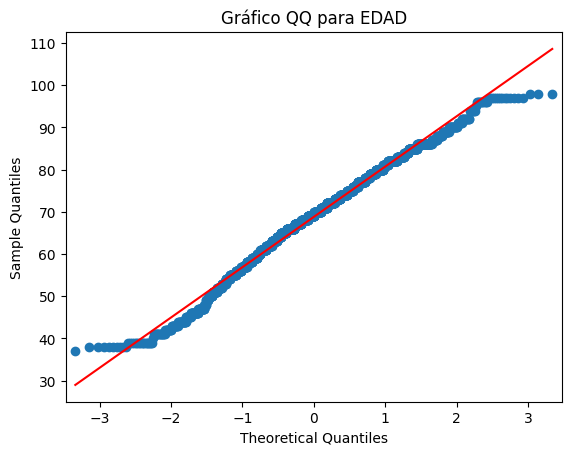


Tests de normalidad para PESO:
Shapiro-Wilk: Estadístico=0.9929, p-valor=0.0000
Kolmogorov-Smirnov: Estadístico=1.0000, p-valor=0.0000
Anderson-Darling: Estadístico=3.0476, valores críticos=[0.575 0.655 0.786 0.916 1.09 ], niveles de significancia=[15.  10.   5.   2.5  1. ]
Jarque-Bera: Estadístico=24.5252, p-valor=0.0000


<Figure size 600x600 with 0 Axes>

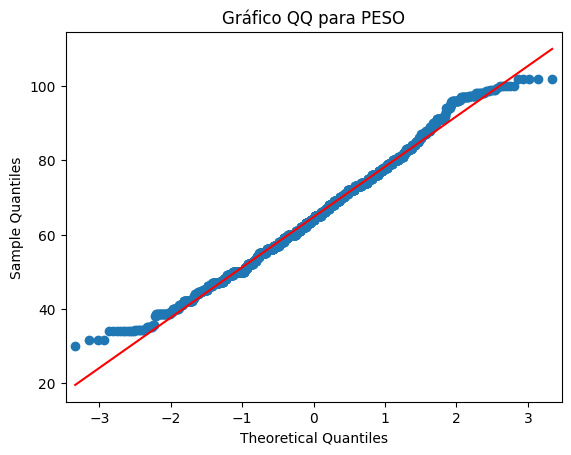


Tests de normalidad para TALLA:
Shapiro-Wilk: Estadístico=0.9934, p-valor=0.0000
Kolmogorov-Smirnov: Estadístico=1.0000, p-valor=0.0000
Anderson-Darling: Estadístico=4.2902, valores críticos=[0.575 0.655 0.786 0.916 1.09 ], niveles de significancia=[15.  10.   5.   2.5  1. ]
Jarque-Bera: Estadístico=22.8170, p-valor=0.0000


<Figure size 600x600 with 0 Axes>

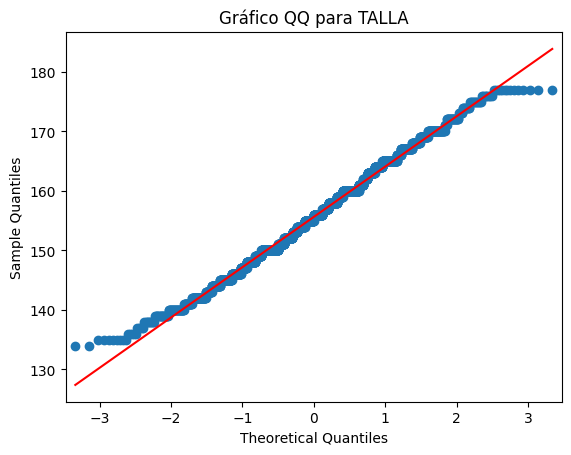

In [ ]:
from scipy.stats import shapiro, kstest, anderson, jarque_bera
import statsmodels.api as sm

# Tests de normalidad y gráficos QQ para 'EDAD'
print("Tests de normalidad para EDAD:")
shapiro_test_edad = shapiro(df_cleaned['EDAD'])
print(f"Shapiro-Wilk: Estadístico={shapiro_test_edad.statistic:.4f}, p-valor={shapiro_test_edad.pvalue:.4f}")

ks_test_edad = kstest(df_cleaned['EDAD'], 'norm')
print(f"Kolmogorov-Smirnov: Estadístico={ks_test_edad.statistic:.4f}, p-valor={ks_test_edad.pvalue:.4f}")

ad_test_edad = anderson(df_cleaned['EDAD'], dist='norm')
print(f"Anderson-Darling: Estadístico={ad_test_edad.statistic:.4f}, valores críticos={ad_test_edad.critical_values}, niveles de significancia={ad_test_edad.significance_level}")

jb_test_edad = jarque_bera(df_cleaned['EDAD'])
print(f"Jarque-Bera: Estadístico={jb_test_edad.statistic:.4f}, p-valor={jb_test_edad.pvalue:.4f}")

plt.figure(figsize=(6, 6))
sm.qqplot(df_cleaned['EDAD'], line='s')
plt.title('Gráfico QQ para EDAD')
plt.show()

# Tests de normalidad y gráficos QQ para 'PESO'
print("\nTests de normalidad para PESO:")
shapiro_test_peso = shapiro(df_cleaned['PESO'])
print(f"Shapiro-Wilk: Estadístico={shapiro_test_peso.statistic:.4f}, p-valor={shapiro_test_peso.pvalue:.4f}")

ks_test_peso = kstest(df_cleaned['PESO'], 'norm')
print(f"Kolmogorov-Smirnov: Estadístico={ks_test_peso.statistic:.4f}, p-valor={ks_test_peso.pvalue:.4f}")

ad_test_peso = anderson(df_cleaned['PESO'], dist='norm')
print(f"Anderson-Darling: Estadístico={ad_test_peso.statistic:.4f}, valores críticos={ad_test_peso.critical_values}, niveles de significancia={ad_test_peso.significance_level}")

jb_test_peso = jarque_bera(df_cleaned['PESO'])
print(f"Jarque-Bera: Estadístico={jb_test_peso.statistic:.4f}, p-valor={jb_test_peso.pvalue:.4f}")

plt.figure(figsize=(6, 6))
sm.qqplot(df_cleaned['PESO'], line='s')
plt.title('Gráfico QQ para PESO')
plt.show()

# Tests de normalidad y gráficos QQ para 'TALLA'
print("\nTests de normalidad para TALLA:")
shapiro_test_talla = shapiro(df_cleaned['TALLA'])
print(f"Shapiro-Wilk: Estadístico={shapiro_test_talla.statistic:.4f}, p-valor={shapiro_test_talla.pvalue:.4f}")

ks_test_talla = kstest(df_cleaned['TALLA'], 'norm')
print(f"Kolmogorov-Smirnov: Estadístico={ks_test_talla.statistic:.4f}, p-valor={ks_test_talla.pvalue:.4f}")

ad_test_talla = anderson(df_cleaned['TALLA'], dist='norm')
print(f"Anderson-Darling: Estadístico={ad_test_talla.statistic:.4f}, valores críticos={ad_test_talla.critical_values}, niveles de significancia={ad_test_talla.significance_level}")

jb_test_talla = jarque_bera(df_cleaned['TALLA'])
print(f"Jarque-Bera: Estadístico={jb_test_talla.statistic:.4f}, p-valor={jb_test_talla.pvalue:.4f}")

plt.figure(figsize=(6, 6))
sm.qqplot(df_cleaned['TALLA'], line='s')
plt.title('Gráfico QQ para TALLA')
plt.show()